<a href="https://www.kaggle.com/code/erhanalasar/telco-customer-churn-prediction?scriptVersionId=187780419" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

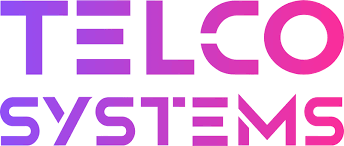

<div class="inner_cell" style="text-align:center;">
  <div class="text_cell_render border-box-sizing rendered_html">
    <p></p>
    <div class="list-group" id="list-tab" role="tablist" style="display:inline-block; text-align:left;">
      <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style="border:2px solid #FF780F;background-color:#FF780F; color:white; font-family:Verdana;text-align: center; font-size:140%;font-weight: Bold;">Notebook Content</h3>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Business Problem</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Dataset Story</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Exploratory Data Analysis (EDA)</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Base Model Setup</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Feature Engineering</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="services" target="_self" 
style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">One-Hot Encoding</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="services" target="_self"  
style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Model</a>
       <a class="list-group-item list-group-item-action" data-toggle="list" href="#9" role="tab" aria-controls="services" target="_self"    
   </div>
  </div>
</div>


<h1 style="color:#FF780F;">Business Problem:</h1>

<h5 style = "color:#000000;"> You are asked to develop a machine learning model that can predict customers who will leave the company..</h5>

<h1 style="color:#FF780F;">Dataset Story:</h1>
<h5 style="color:#000000;">CustomerID : ID of the customer</h5>
<h5 style="color:#000000;">Gender : Sex of the customer</h5>
<h5 style="color:#000000;">Partner : Whether the customer has a partner or not (Yes, No)</h5>
<h5 style="color:#000000;">Dependents : Whether the customer has dependents (Yes, No)</h5>
<h5 style="color:#000000;">tenure : The number of months customer stays in the company </h5>
<h5 style="color:#000000;">PhoneService : Whether the customer has phone service (Yes, No)</h5>
<h5 style="color:#000000;">MultipleLines : Whether the customer has more than one line (Yes, No, No phone service)</h5>
<h5 style="color:#000000;">InternetService : Customer's internet service provider (DSL, Fiber optic, No)</h5>
<h5 style="color:#000000;">OnlineSecurity : Whether the customer has online security (Yes, No, No Internet service)</h5>
<h5 style="color:#000000;">OnlineBackup : Whether the customer has online backup (Yes, No, No Internet service)</h5>
<h5 style="color:#000000;">DeviceProtection : Whether the customer has device protection (Yes, No, No Internet service)</h5>
<h5 style="color:#000000;">TechSupport : Whether the customer receives technical support (Yes, No, No Internet service)</h5>
<h5 style="color:#000000;">StreamingTV : Indicates whether the customer has streaming TV (Yes, No, No Internet service) Indicates whether the customer uses the Internet service to stream television programs from a third-party provider</h5>
<h5 style="color:#000000;">StreamingMovies : Whether the customer has streaming movies (Yes, No, No Internet service) Indicates whether the customer is using the Internet service to stream movies from a third-party provider</h5>
<h5 style="color:#000000;">Contract : Duration of the customer's contract (Month to month, One year, Two years)</h5>
<h5 style="color:#000000;">PaperlessBilling : Whether the customer has a paperless bill (Yes, No)</h5>
<h5 style="color:#000000;">PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))</h5>
<h5 style="color:#000000;">MonthlyCharges : Amount charged to the customer monthly</h5>
<h5 style="color:#000000;">TotalCharges : Total amount charged to the customer</h5>
<h5 style="color:#000000;">Churn : Whether the customer is using or not (Yes or No) - Customers who left in the last month or quarter</h5>

<h1 style="color:#FF780F;">Explaratory Data Analysis (EDA):</h1>

# Importings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings

warnings.simplefilter(action="ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 170)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Load Dataset

In [ ]:
df = pd.read_csv('/kaggle/input/telcochurn/Telco-Customer-Churn.csv')
df.head()

# Overview & Preprocessing

In [ ]:
# Step 1: Examine the general picture.
def check_df(dataframe, head=5, tail=5, quan=False):
    print('########## Shape ##########')
    print(dataframe.shape)
    print('########## Types ##########')
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print('########## Head ##########')
    print(dataframe.head(head))
    print('########## Tail ##########')
    print(dataframe.tail(tail))
    print('########## NA ##########')
    print(dataframe.isnull().sum())
    if quan:
        print('########## Quantiles ##########')
        print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

In [ ]:
# Total charges datatype is object. There are ' ' values. Make them NaN and convert it to float and typecast Churn to 0 and 1's
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [ ]:
# Step 2: Capture numerical and categorical variables.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [ ]:
cat_cols, num_cols, cat_but_car

In [ ]:
# Step 3: Analyze the numerical and categorical variables.
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            
            # TARGET_COUNT
            sns.countplot(x=col_name, data=dataframe, ax=ax1)
            ax1.set_title(f"Frequency of {col_name}")
            ax1.set_ylabel("TARGET_COUNT")
            ax1.tick_params(axis="x", rotation=45)
            
            # RATIO
            values = dataframe[col_name].value_counts()
            ax2.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
            ax2.set_title(f"RATIO by {col_name}")
            ax2.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            
            plt.tight_layout()
            plt.show()

    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            
            # TARGET_COUNT
            sns.countplot(x=col_name, data=dataframe, ax=ax1)
            ax1.set_title(f"Frequency of {col_name}")
            ax1.set_ylabel("TARGET_COUNT")
            ax1.tick_params(axis="x", rotation=45)
            
            # RATIO
            values = dataframe[col_name].value_counts()
            ax2.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
            ax2.set_title(f"RATIO by {col_name}")
            ax2.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            
            plt.tight_layout()
            plt.show()

def num_summary(dataframe, numerical_col, plot=False, hist_bins=20):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(numerical_col)
    print("##########################################")
    print(dataframe[numerical_col].describe(quantiles).T)
    print("##########################################")

    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=hist_bins)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " Distribution")
        
        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], fill=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + " KDE")
        
        # QQ Plot
        plt.subplot(2, 2, 4)
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + " QQ Plot")
        
        plt.tight_layout()
        plt.show(block=True)

In [ ]:
# Analyze categorical cols
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [ ]:
# Analyze numerical cols:
for col in num_cols:
    num_summary(df, col, plot=True)

In [ ]:
# Step 4 Analyze the target variable 

# Average of the target variable according to categorical variables,
# Average of the numeric variable according to the target variable

def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    summary = pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                            "TARGET_COUNT": dataframe.groupby(categorical_col)[target].count(),
                            "RATIO": 100 * dataframe[categorical_col].value_counts() / len(dataframe)})
    
    print(summary, end="\n\n\n")
    print("##########################################")

    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 6))
        
        # TARGET_MEAN
        summary["TARGET_MEAN"].plot(kind="bar", ax=ax1)
        ax1.set_title(f"TARGET_MEAN by {categorical_col}")
        ax1.set_ylabel("TARGET_MEAN")
        ax1.tick_params(axis="x", rotation=45)
        
        # TARGET_COUNT
        sns.countplot(x=categorical_col, data=dataframe, ax=ax2)
        ax2.set_title(f"Frequency of {categorical_col}")
        ax2.set_ylabel("TARGET_COUNT")
        ax2.tick_params(axis="x", rotation=45)
        
        # RATIO
        values = dataframe[categorical_col].value_counts()
        ax3.pie(x=values, labels=values.index, autopct="%1.1f%%", startangle=90)
        ax3.set_title(f"RATIO by {categorical_col}")
        ax3.legend(labels=[f"{index} - {value/sum(values)*100:.2f}%" for index, value in zip(values.index, values)],
                   loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        
        plt.tight_layout()
        plt.show(block=True)

    
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    # Group by target and calculate mean
    summary_df = dataframe.groupby(target).agg({numerical_col: "mean"})
    print(summary_df)
    print("##########################################")

    if plot:

        # Bar plot
        summary_df.plot(kind="bar", legend=False)
        plt.title(f"Mean of {numerical_col} by {target}")
        plt.xlabel(target)
        plt.xticks(rotation=45)
        plt.ylabel(f"Mean of {numerical_col}")
        plt.show(block=True)



In [ ]:
# Target variable anaylsis by catagorical variables
# Churn is the target variable. so remove it from cat_cols.
cat_cols = [col for col in cat_cols if "Churn" not in col]
for col in cat_cols:
    target_summary_with_cat(df, 'Churn', col, plot=True)

In [ ]:
# Target variable anaylsis by numerical variables
for col in num_cols:
    target_summary_with_num(df,'Churn',col, plot=True)

In [ ]:
# Step 5 Analyze outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

    
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [ ]:
for col in num_cols:
    print(col, check_outlier(df,col))
# There are no outliers.

In [ ]:
# Step 6 Analyze missing values
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
missing_values_table(df)
# Only TotalCharges variable has missing values

In [ ]:
# Check Null Total charges with tenure and contract type
df.loc[df['TotalCharges'].isnull(),['Contract', 'tenure']]

In [ ]:
# All the contracts are one year or two but tenure values are 0.We can consider deleting these Null values.
df = df.dropna(subset=['TotalCharges'])

In [ ]:
# Perform correlation analysis.
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    # Optionally, plot a heatmap
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (18, 13)})
        sns.heatmap(corr, cmap='magma', annot=True, fmt='.2f')
        plt.show()

    return drop_list

In [ ]:
high_correlated_cols(df[num_cols], plot=True)

<h1 style="color:#FF780F;">Base Model Setup</h1>

In [ ]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ['Churn']]
cat_cols

# One Hot Encoding

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
dff = one_hot_encoder(dff, cat_cols, drop_first =True)

In [ ]:
dff.head()

In [ ]:
y = dff[['Churn']]
X  = dff.drop(['Churn', 'customerID'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [ ]:
# List of models to evaluate
models = [('LR', LogisticRegression(random_state=21)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=21)),
          ('RF', RandomForestClassifier(random_state=21)),
          ('SVM', SVC(gamma='auto', random_state=21)),
          ('XGB', XGBClassifier(random_state=21)),
          ("LightGBM", LGBMClassifier(random_state=21)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=21))]

In [ ]:
# Train each model and evaluate its performance using cross-validation.
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

<h1 style="color:#FF780F;">Feature Engineering:</h1>

<h5 style="color:#000000;">There are no missing values and outliers. We can start extracting new features</h5>

# Feature Extraction

In [ ]:
df.head()

In [ ]:
df.loc[(df["tenure"] >= 0) & (df["tenure"] <= 12), "NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"] > 12) & (df["tenure"] <= 24), "NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"] > 24) & (df["tenure"] <= 36), "NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"] > 36) & (df["tenure"] <= 48), "NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"] > 48) & (df["tenure"] <= 60), "NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"] > 60) & (df["tenure"] <= 72), "NEW_TENURE_YEAR"] = "5-6 Year"

# Marking customers with 1 or 2-year contracts as 'Engaged' to identify potentially loyal customers.
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

# Identifying customers who do not have any of the support, backup, or protection services.
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (
        x["TechSupport"] != "Yes") else 0, axis=1)

# Identifying young, not engaged (monthly contracts) customers potentially at higher risk of churning.
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0,
                                       axis=1)

# Counting the total number of services each customer has subscribed to.
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

# Identifying customers who have subscribed to any streaming service.
df["NEW_FLAG_ANY_STREAMING"] = df.apply(
    lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Marking customers who use automatic payment methods.
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(
    lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)

# Calculating the average monthly charges.
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

# Identifying the increase in current charges compared to the average charges.
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Calculating the average service fee per subscribed service.
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [ ]:
df.head()

# ENCODING

In [ ]:
# Separate variables by type
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


In [ ]:
binary_cols = [col for col in df.columns if df[col].dtypes == 'O' and df[col].nunique() == 2]
binary_cols

In [ ]:
for col in binary_cols:
    label_encoder(df, col)

# ONE-HOT ENCODING

In [ ]:
# update cat cols
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TOTAL_SERVICES", "NEW_TOTAL_ONLINE_SERVICES"]]
cat_cols

In [ ]:
# define one hpt encoder function
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

<h1 style="color:#FF780F;">Model:</h1>

In [ ]:
# Define the target variable 'y' and feature set 'X'.
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)  # Drop 'customerID' as it's not a feature.

In [ ]:
# Define a list of models to evaluate.
models = [
    ('LR', LogisticRegression(random_state=42, max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(gamma='auto', random_state=42)),
    ('XGB', XGBClassifier(random_state=425)),
    ("LightGBM", LGBMClassifier(verbose=-1,random_state=42)),
    ("CatBoost", CatBoostClassifier(verbose=False, random_state=42))
]

In [ ]:
# Loop through models to train and evaluate them using cross-validation.
# Scoring metrics include accuracy, F1 score, ROC AUC, precision, and recall.
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

# Random Forest Hyperparameter Tuning

In [ ]:
# Initialize a Random Forest classifier.
rf_model = RandomForestClassifier(random_state=21)

In [ ]:

# Define the parameter grid for Random Forests.
rf_params = {
    "max_depth": [5, 8, None],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 8],
    "n_estimators": [100, 200]
}

In [ ]:
# Perform grid search with cross-validation to find the best parameters.
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

In [ ]:
# Output the best parameters and the best score achieved.
print(rf_best_grid.best_params_) #{'max_depth': 8, 'max_features': 7, 'min_samples_split': 15, 'n_estimators': 100}

print(rf_best_grid.best_score_) #0.0.7993431541742618

In [ ]:
# Train the final model with the best parameters.
rf_final: object = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
# Evaluate the final model using cross-validation.
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print(f"Random Forests Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Random Forests F1: {cv_results['test_f1'].mean()}")
print(f"Random Forests ROC AUC: {cv_results['test_roc_auc'].mean()}")

# XGBoost Hyperparameter Tuning

In [ ]:
# Initialize an XGBoost classifier.
xgboost_model = XGBClassifier(random_state=42)

In [ ]:
# Define the parameter grid for XGBoost.
xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5,12, 20],
    "n_estimators": [100, 500],
    "colsample_bytree": [0.7, 1]
}

In [ ]:
# Perform grid search with cross-validation to find the best parameters.
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=3, n_jobs=-1, verbose=True).fit(X, y)

In [ ]:
# Train the final model with the best parameters.
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
# Evaluate the final model using cross-validation.
cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print(f"XGBoost Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"XGBoost F1: {cv_results['test_f1'].mean()}")
print(f"XGBoost ROC AUC: {cv_results['test_roc_auc'].mean()}")

# LightGBM Hyperparameter Tuning

In [ ]:
# Initialize a LightGBM classifier.
lgbm_model = LGBMClassifier(verbose =-1,random_state=17)

In [ ]:
# Define the parameter grid for LightGBM.
lgbm_params = {
    "learning_rate": [0.1, 0.001],
    "n_estimators": [100, 500, 1000],
    "colsample_bytree": [0.7, 1]
}

In [ ]:
# Perform grid search with cross-validation to find the best parameters.
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

In [ ]:
# Train the final model with the best parameters.
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
# Evaluate the final model using cross-validation.
cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print(f"LightGBM Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"LightGBM F1: {cv_results['test_f1'].mean()}")
print(f"LightGBM ROC AUC: {cv_results['test_roc_auc'].mean()}")


# CatBoost Optimization

In [ ]:
# Initialize the CatBoost classifier with specific random state for reproducibility and silent mode to reduce log noise.
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [ ]:
# Define the hyperparameter grid for the CatBoost model.
catboost_params = {
    "iterations": [200, 500],  # Number of trees
    "learning_rate": [0.05, 0.1],  # Step size for tree's weight adjustment
    "depth": [3, 6]  # Depth of trees
}


In [ ]:
# Perform grid search to find the best hyperparameters within the defined grid, using cross-validation.
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

In [ ]:
# Apply the best hyperparameters to the CatBoost model.
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
# Evaluate the optimized CatBoost model using cross-validation and several metrics.
cv_results = cross_validate(catboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [ ]:
# Print out the average scores from cross-validation to assess model performance.
print(f"CatBoost Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"CatBoost F1 Score: {cv_results['test_f1'].mean()}")
print(f"CatBoost ROC AUC: {cv_results['test_roc_auc'].mean()}")

# Feature Importance Analysis

In [ ]:
# Function to plot the importance of features for the given model.
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

In [ ]:
# Plot feature importance for all final models to understand which features are most influential in predicting churn.
plot_importance(rf_final, X)
plot_importance(xgboost_final, X)
plot_importance(lgbm_final, X)
plot_importance(catboost_final, X)